In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

# CNN + GRU

In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 27s 597ms/step - loss: 3.2040 - accuracy: 0.3839 - val_loss: 2.4728 - val_accuracy: 0.5088
Epoch 2/100
40/40 [==============================] - 20s 492ms/step - loss: 2.4099 - accuracy: 0.4972 - val_loss: 2.2813 - val_accuracy: 0.5216
Epoch 3/100
40/40 [==============================] - 18s 459ms/step - loss: 2.1658 - accuracy: 0.5174 - val_loss: 2.1677 - val_accuracy: 0.5216
Epoch 4/100
40/40 [==============================] - 19s 476ms/step - loss: 2.0344 - accuracy: 0.5216 - val_loss: 2.0518 - val_accuracy: 0.5344
Epoch 5/100
40/40 [==============================] - 19s 464ms/step - loss: 1.8952 - accuracy: 0.5313 - val_loss: 1.9436 - val_accuracy: 0.5696
Epoch 6/100
40/40 [==============================] - 18s 443ms/step - loss: 1.7898 - accuracy: 0.5670 - val_loss: 1.8467 - val_accuracy: 0.5616
Epoch 7/100
40/40 [==============================] - 19s 466ms/step - loss: 1.6542 - accuracy: 0.5882 - val_loss: 1.7517 - val_accuracy:

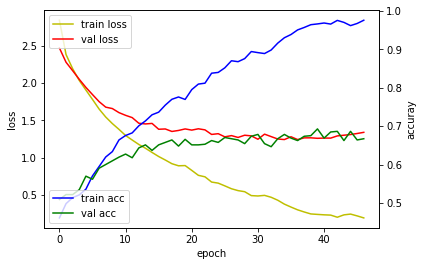

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [5]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN_GRU.csv', index=False)

# CNN + CNN + GRU

In [6]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 6s 125ms/step - loss: 2.9846 - accuracy: 0.4385 - val_loss: 2.3950 - val_accuracy: 0.5232
Epoch 2/100
40/40 [==============================] - 5s 122ms/step - loss: 2.4184 - accuracy: 0.4945 - val_loss: 2.2538 - val_accuracy: 0.5232
Epoch 3/100
40/40 [==============================] - 9s 220ms/step - loss: 2.1831 - accuracy: 0.5262 - val_loss: 2.1486 - val_accuracy: 0.5424
Epoch 4/100
40/40 [==============================] - 9s 234ms/step - loss: 2.1201 - accuracy: 0.5220 - val_loss: 2.0758 - val_accuracy: 0.5440
Epoch 5/100
40/40 [==============================] - 9s 233ms/step - loss: 2.0040 - accuracy: 0.5392 - val_loss: 1.9832 - val_accuracy: 0.5488
Epoch 6/100
40/40 [==============================] - 10s 255ms/step - loss: 1.9014 - accuracy: 0.5372 - val_loss: 1.9462 - val_accuracy: 0.5696
Epoch 7/100
40/40 [==============================] - 10s 251ms/step - loss: 1.8676 - accuracy: 0.5530 - val_loss: 1.8673 - val_accuracy: 0.57

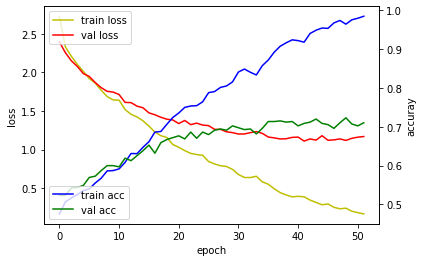

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN2_GRU.csv', index=False)

# CNN + CNN + CNN + GRU

In [9]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 19s 412ms/step - loss: 2.8509 - accuracy: 0.4545 - val_loss: 2.5255 - val_accuracy: 0.5216
Epoch 2/100
40/40 [==============================] - 12s 308ms/step - loss: 2.4396 - accuracy: 0.5134 - val_loss: 2.3719 - val_accuracy: 0.5296
Epoch 3/100
40/40 [==============================] - 13s 324ms/step - loss: 2.3449 - accuracy: 0.5164 - val_loss: 2.2698 - val_accuracy: 0.5248
Epoch 4/100
40/40 [==============================] - 14s 339ms/step - loss: 2.3222 - accuracy: 0.4938 - val_loss: 2.1640 - val_accuracy: 0.5344
Epoch 5/100
40/40 [==============================] - 13s 319ms/step - loss: 2.1435 - accuracy: 0.5247 - val_loss: 2.0880 - val_accuracy: 0.5424
Epoch 6/100
40/40 [==============================] - 13s 328ms/step - loss: 2.0347 - accuracy: 0.5362 - val_loss: 2.0818 - val_accuracy: 0.5408
Epoch 7/100
40/40 [==============================] - 16s 394ms/step - loss: 2.0272 - accuracy: 0.5357 - val_loss: 1.9424 - val_accuracy:

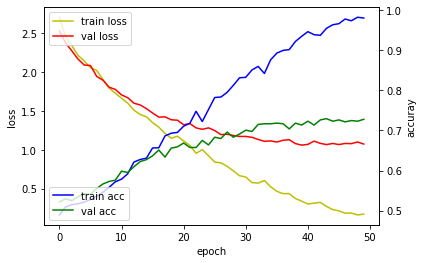

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN3_GRU.csv', index=False)

## CNN+CNN+CNN+CNN+ GRU

In [13]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 25s 560ms/step - loss: 3.1170 - accuracy: 0.4120 - val_loss: 2.7019 - val_accuracy: 0.5152
Epoch 2/100
40/40 [==============================] - 17s 430ms/step - loss: 2.7117 - accuracy: 0.5053 - val_loss: 2.6431 - val_accuracy: 0.5152
Epoch 3/100
40/40 [==============================] - 16s 393ms/step - loss: 2.6477 - accuracy: 0.5033 - val_loss: 2.5823 - val_accuracy: 0.5216
Epoch 4/100
40/40 [==============================] - 17s 418ms/step - loss: 2.6481 - accuracy: 0.4944 - val_loss: 2.5526 - val_accuracy: 0.5216
Epoch 5/100
40/40 [==============================] - 18s 448ms/step - loss: 2.5341 - accuracy: 0.5055 - val_loss: 2.3721 - val_accuracy: 0.5248
Epoch 6/100
40/40 [==============================] - 17s 423ms/step - loss: 2.4019 - accuracy: 0.5090 - val_loss: 2.2459 - val_accuracy: 0.5264
Epoch 7/100
40/40 [==============================] - 16s 403ms/step - loss: 2.2339 - accuracy: 0.5125 - val_loss: 2.2496 - val_accuracy:

# CNN * n + Bi GRU

In [14]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(GRU(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 46s 1s/step - loss: 3.0759 - accuracy: 0.4308 - val_loss: 2.3824 - val_accuracy: 0.5248
Epoch 2/100
40/40 [==============================] - 37s 926ms/step - loss: 2.1417 - accuracy: 0.5305 - val_loss: 2.0523 - val_accuracy: 0.5456
Epoch 3/100
40/40 [==============================] - 39s 983ms/step - loss: 1.8240 - accuracy: 0.5625 - val_loss: 1.8759 - val_accuracy: 0.5648
Epoch 4/100
40/40 [==============================] - 39s 982ms/step - loss: 1.5600 - accuracy: 0.6102 - val_loss: 1.7304 - val_accuracy: 0.5824
Epoch 5/100
40/40 [==============================] - 36s 910ms/step - loss: 1.4414 - accuracy: 0.6345 - val_loss: 1.5883 - val_accuracy: 0.6080
Epoch 6/100
40/40 [==============================] - 36s 901ms/step - loss: 1.2645 - accuracy: 0.6764 - val_loss: 1.4628 - val_accuracy: 0.6352
Epoch 7/100
40/40 [==============================] - 36s 906ms/step - loss: 1.0843 - accuracy: 0.7113 - val_loss: 1.4125 - val_accuracy: 0.

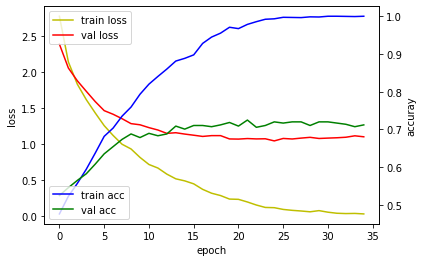

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [16]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN1_BiGRU.csv', index=False)

In [17]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(GRU(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 25s 532ms/step - loss: 2.9799 - accuracy: 0.4333 - val_loss: 2.3122 - val_accuracy: 0.5280
Epoch 2/100
40/40 [==============================] - 14s 355ms/step - loss: 2.2305 - accuracy: 0.5163 - val_loss: 2.0812 - val_accuracy: 0.5488
Epoch 3/100
40/40 [==============================] - 15s 374ms/step - loss: 2.0093 - accuracy: 0.5357 - val_loss: 1.9565 - val_accuracy: 0.5648
Epoch 4/100
40/40 [==============================] - 13s 328ms/step - loss: 1.7738 - accuracy: 0.5832 - val_loss: 1.8231 - val_accuracy: 0.5712
Epoch 5/100
40/40 [==============================] - 14s 361ms/step - loss: 1.7585 - accuracy: 0.5675 - val_loss: 1.7590 - val_accuracy: 0.5760
Epoch 6/100
40/40 [==============================] - 14s 359ms/step - loss: 1.6051 - accuracy: 0.5917 - val_loss: 1.7141 - val_accuracy: 0.6048
Epoch 7/100
40/40 [==============================] - 14s 346ms/step - loss: 1.4633 - accuracy: 0.6309 - val_loss: 1.6083 - val_accuracy:

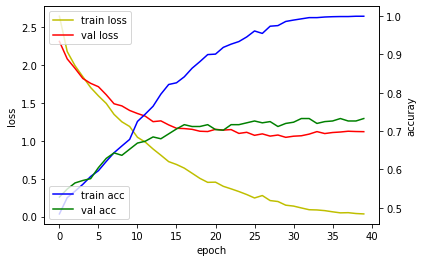

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [19]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN2_BiGRU.csv', index=False)

In [20]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(GRU(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 22s 499ms/step - loss: 2.9259 - accuracy: 0.4419 - val_loss: 2.4384 - val_accuracy: 0.5280
Epoch 2/100
40/40 [==============================] - 13s 337ms/step - loss: 2.4362 - accuracy: 0.5177 - val_loss: 2.2753 - val_accuracy: 0.5312
Epoch 3/100
40/40 [==============================] - 14s 343ms/step - loss: 2.3182 - accuracy: 0.5094 - val_loss: 2.1922 - val_accuracy: 0.5344
Epoch 4/100
40/40 [==============================] - 13s 331ms/step - loss: 2.2089 - accuracy: 0.5254 - val_loss: 2.0894 - val_accuracy: 0.5488
Epoch 5/100
40/40 [==============================] - 12s 304ms/step - loss: 2.0248 - accuracy: 0.5428 - val_loss: 2.0308 - val_accuracy: 0.5536
Epoch 6/100
40/40 [==============================] - 15s 372ms/step - loss: 1.9157 - accuracy: 0.5588 - val_loss: 1.8905 - val_accuracy: 0.5776
Epoch 7/100
40/40 [==============================] - 13s 328ms/step - loss: 1.8604 - accuracy: 0.5566 - val_loss: 1.7807 - val_accuracy:

40/40 [==============================] - 12s 305ms/step - loss: 0.0243 - accuracy: 0.9999 - val_loss: 1.0162 - val_accuracy: 0.7600
Epoch 58/100
40/40 [==============================] - 13s 326ms/step - loss: 0.0228 - accuracy: 0.9998 - val_loss: 1.0154 - val_accuracy: 0.7632
Epoch 59/100
40/40 [==============================] - 13s 331ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.9965 - val_accuracy: 0.7616
Epoch 60/100
40/40 [==============================] - 13s 320ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.0048 - val_accuracy: 0.7648
Epoch 61/100
40/40 [==============================] - 13s 326ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.0110 - val_accuracy: 0.7632
Epoch 62/100
40/40 [==============================] - 12s 291ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 1.0187 - val_accuracy: 0.7616
Epoch 63/100
40/40 [==============================] - 13s 333ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.0218 - val_accuracy: 0.763

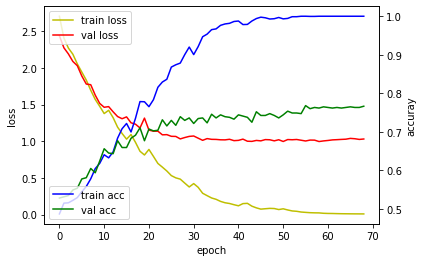

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN3_BiGRU.csv', index=False)